In [34]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import neuro_op as nop

In [35]:
nop.plot_setup()
cmap = "inferno"

# Purpose

Analyse behaviour of a single node in neuro_op's framework.

Scanned dimensions:
- $\mu\in [0.0,1.0,...,5.0]$
- $\sigma\in [0.5,1,5,10]$

In [77]:
def get_name(mu, sd):
    return str(
        "../testing/2024-06--1--ConjMu-N0/"
        + "out-N1-mu-" 
        + str(round(mu/1.0, 3))
        + "-sd-"
        + str(sd)
        + ".h5"
    )

def get_kld(mu, sd):
    data = nop.import_hdf5(get_name(mu, sd))
    return data["kl_divs"][:,0]


In [78]:
kld1 = get_kld(0,1)
kld1

array([3.18088315e-01, 2.11686837e-01, 2.11686837e-01, ...,
       1.99391543e-04, 1.95249209e-04, 1.95881196e-04])

In [93]:
# Create xarray dataset with the following dimensions:
# - time
# - mu
# - sigma (standard deviation sd)

mu_arr = np.arange(0.0, 5.1, 1.0)
sd_arr = [0.5, 1, 2, 5, 10]
t_arr = np.arange(0, 10001, 1)
kld_arr = np.zeros((len(mu_arr), len(sd_arr), len(t_arr)))

for i, mu in enumerate(mu_arr):
    for j, sd in enumerate(sd_arr):
        kld_arr[i, j, :] = get_kld(mu, sd)[:len(t_arr)]

ds = xr.Dataset(
    {"kld": (("mu", "sd", "time"), kld_arr)},
    coords={"mu": mu_arr, "sd": sd_arr, "time": t_arr},
)

[]

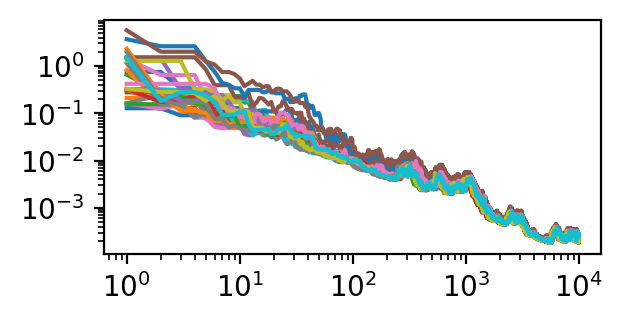

In [101]:
fig, ax = plt.subplots(1,1)
for i, mu in enumerate(mu_arr):
    for j, sd in enumerate(sd_arr):
        ax.plot(t_arr[1:], ds["kld"][i,j,1:], label=f"mu={mu}, sd={sd}")

ax.loglog()